In [1]:
#Preparation

In [5]:
#Importing the libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_auc_score, roc_curve
import shap

In [6]:
#Uploading the dataset for analysis
dataset = pd.read_csv('data.csv')
print(f'Dataset shape: {dataset.shape}')
print(f'Number of numerical features: {dataset.select_dtypes(include = ["number"]).shape[1]}')
print(f'Number of categorical features: {dataset.select_dtypes(include = ["object"]).shape[1]}')

Dataset shape: (568, 32)
Number of numerical features: 31
Number of categorical features: 1


In [7]:
#Formating the information in dataset
dataset.columns = ['ID', 'Diagnosis', 'Radius_Mean', 'Texture_Mean', 'Perimeter_Mean',
                   'Area_Mean', 'Smoothness_Mean', 'Compactness_Mean', 'Concavity_Mean', 'Concave_Points_Mean',
                   'Symmetry_Mean', 'Fractal_Dimension_Mean', 'Radius_SE', 'Texture_SE', 'Perimeter_SE',
                   'Area_SE', 'Smoothness_SE', 'Compactness_SE', 'Concavity_SE', 'Concave_Points_SE',
                   'Symmetry_SE', 'Fractal_Dimension_SE', 'Radius_Worst', 'Texture_Worst', 'Perimeter_Worst',
                   'Area_Worst', 'Smoothness_Worst', 'Compactness_Worst', 'Concavity_Worst', 'Concave_Points_Worst',
                   'Symmetry_Worst', 'Fractal_Dimension_Worst']
dataset = dataset.iloc[ : , 1:32]
dataset = dataset[[col for col in dataset.columns if col != 'Diagnosis'] + ['Diagnosis']]
dataset['Diagnosis'].replace({'B': 0, 'M': 1}, inplace = True)
dataset.head()

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,Fractal_Dimension_Mean,...,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst,Diagnosis
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1


In [8]:
#Splitting the dataset into segments
X = dataset.iloc[ : , 0:30].values
Y = dataset.iloc[ : , -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (426, 30)
X_test shape: (142, 30)
Y_train shape: (426,)
Y_test shape: (142,)


In [9]:
#Standardizing the features of dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = dataset.columns[0:30])
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = dataset.columns[0:30])
X_train.head()

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,Fractal_Dimension_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,-0.540712,0.684887,-0.532307,-0.570253,0.340093,-0.076010,-0.453763,-0.546924,-0.941021,0.659910,...,-0.585214,0.458665,-0.624466,-0.597488,0.561418,-0.157288,-0.515519,-0.519455,-1.027308,0.338558
1,-0.428822,-1.319631,-0.450035,-0.488146,0.016102,-0.406675,-0.968020,-0.781684,-0.625819,-0.266871,...,-0.602434,-1.376119,-0.587977,-0.596201,-0.109848,-0.707212,-1.073038,-0.802171,-0.865834,-0.837280
2,-0.861658,-1.082129,-0.893367,-0.791882,-0.957299,-1.147236,-1.118017,-1.207779,-0.136713,-0.293510,...,-0.761722,-0.625823,-0.787738,-0.708413,-0.685218,-1.020022,-1.297118,-1.516370,-0.152793,-0.567273
3,1.753021,2.117025,1.656647,1.799244,0.096921,-0.040252,0.683850,1.274942,-0.212796,-1.061855,...,1.591004,2.026423,1.467149,1.569509,-0.685218,-0.421455,0.215425,0.715578,-0.541288,-0.992425
4,-0.096099,-0.987128,-0.142686,-0.204639,-0.091894,-0.539355,-0.566013,-0.314518,1.084240,-0.613187,...,-0.283858,-0.678246,-0.284007,-0.382260,-0.602399,-0.547188,-0.626573,-0.244681,0.071032,-0.842723


In [10]:
#Exploration

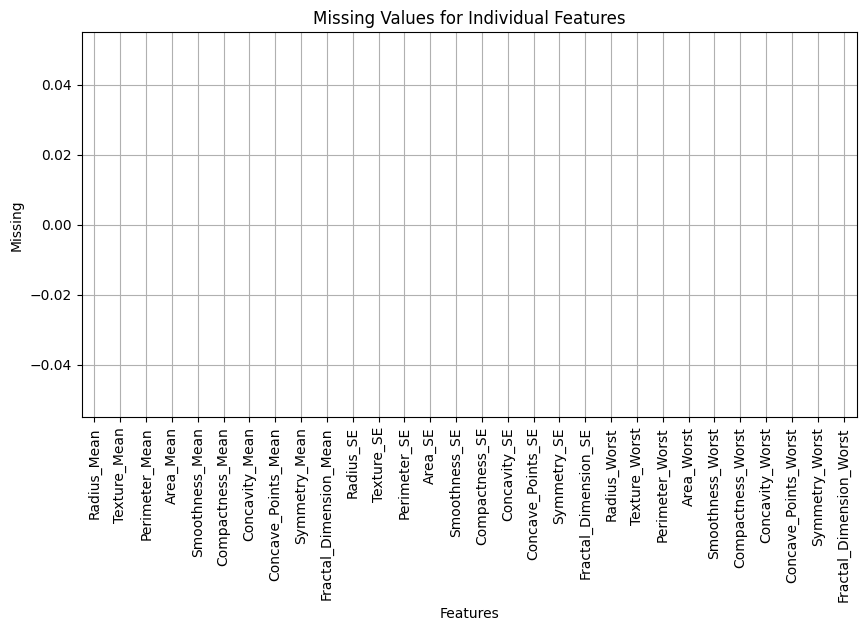

In [11]:
#Checking the dataset for missing
plt.figure(figsize = (10, 5))
missing_counts = X_train.isnull().sum()
missing_counts.plot(kind = 'bar', grid = True)
plt.title('Missing Values for Individual Features')
plt.xlabel('Features')
plt.ylabel('Missing')
plt.show()

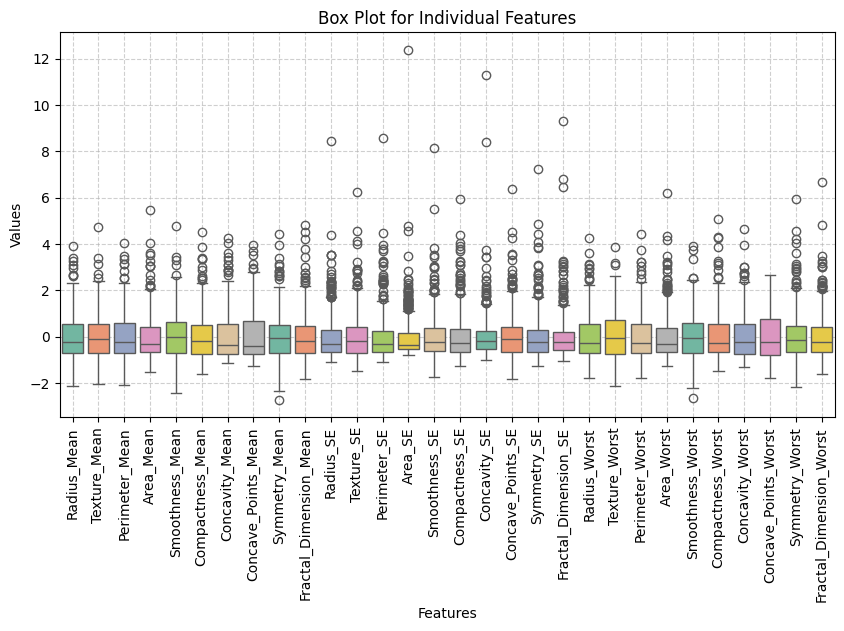

In [12]:
#Checking the dataset for outliers
plt.figure(figsize = (10, 5))
sns.boxplot(data = X_train, palette = "Set2")
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xticks(rotation = 90)
plt.title('Box Plot for Individual Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

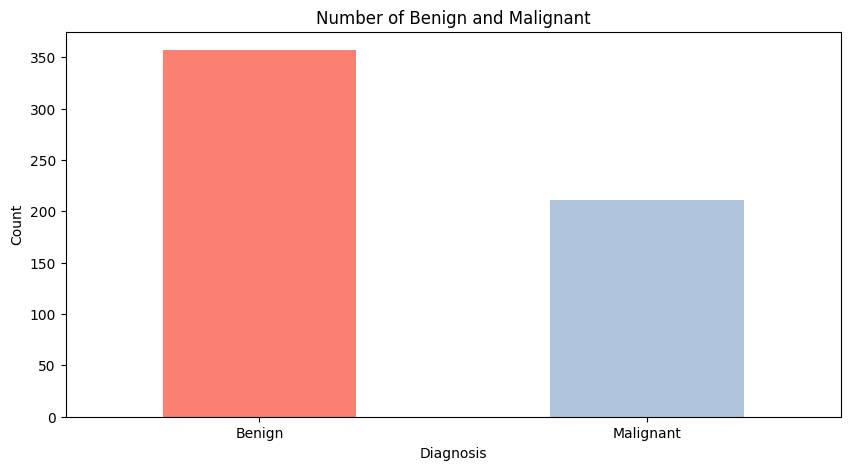

In [13]:
#Checking skewness of target variable
plt.figure(figsize = (10, 5))
dataset['Diagnosis'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightsteelblue'])
plt.xticks(ticks = range(2), labels = ['Benign', 'Malignant'], rotation = 0)
plt.title('Number of Benign and Malignant')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

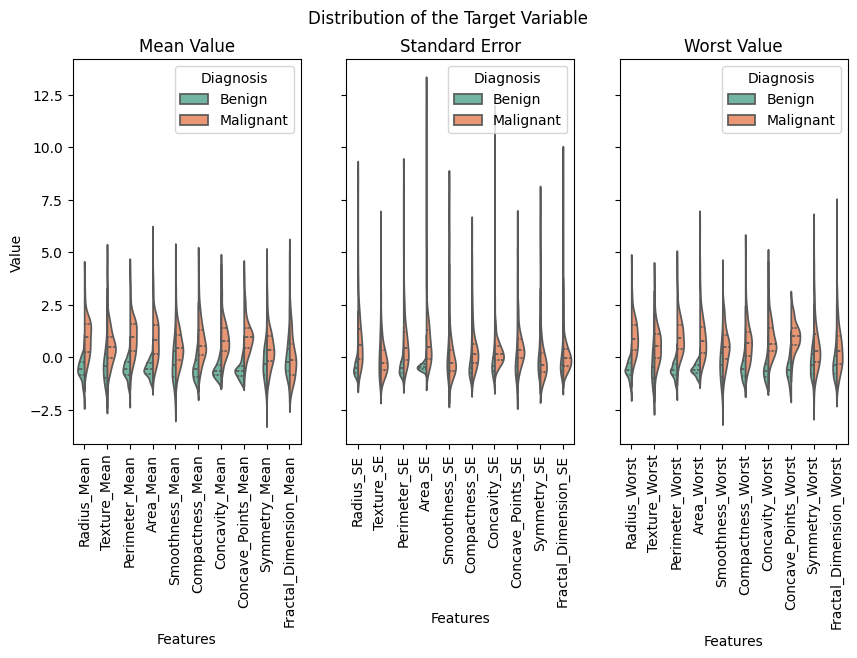

In [14]:
#Checking distribution of target variable
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 5), sharey = True)
fig.suptitle('Distribution of the Target Variable')
Y = pd.DataFrame(Y_train, columns = ['Diagnosis'])
ranges = [(0, 10), (10, 20), (20, 30)]
titles = ['Mean Value', 'Standard Error', 'Worst Value']
label_mapping = {0: 'Benign', 1: 'Malignant'}
for i, (start, end) in enumerate(ranges):
    X_subset = X_train.iloc[:, start:end]
    data_subset = pd.concat([X_subset, Y], axis = 1)
    melted_data = pd.melt(data_subset, id_vars = "Diagnosis", var_name = "features", value_name = 'value')
    sns.violinplot(x = "features", y = "value", hue = "Diagnosis", data = melted_data, split = True, inner = "quart", palette = "Set2", ax = axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Features")
    axes[i].set_ylabel("Value")
    axes[i].tick_params(axis = 'x', rotation = 90)
    handles, labels = axes[i].get_legend_handles_labels()
    new_labels = [label_mapping[int(label)] for label in labels]
    axes[i].legend(handles, new_labels, title = 'Diagnosis')
plt.show()

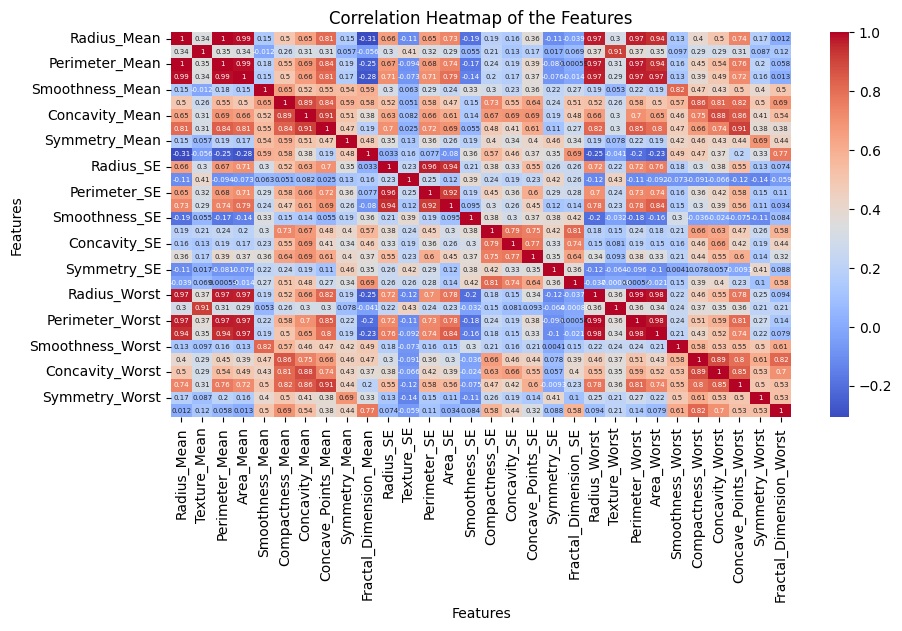

In [15]:
#Checking correlation between the features
plt.figure(figsize = (10, 5))
sns.heatmap(X_train.corr(), annot = True, annot_kws = {'size': 5}, cmap = 'coolwarm')
plt.title('Correlation Heatmap of the Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [16]:
#Modelling

In [17]:
#Selecting the features for modeling
selected_features = ['Radius_Mean', 'Texture_Mean', 'Perimeter_Mean', 'Area_Mean', 'Smoothness_Mean',
                     'Compactness_Mean', 'Concavity_Mean', 'Concave_Points_Mean', 'Symmetry_Mean',
                     'Fractal_Dimension_Mean']

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [18]:
#Training the logestic regression model
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, Y_train)
Y_pred1 = LR.predict(X_test)

In [19]:
#Training the support vector model
SV = SVC(kernel = 'rbf', probability = True, random_state = 0)
SV.fit(X_train, Y_train)
Y_pred2 = SV.predict(X_test)

In [20]:
#Training the nearest neighbor model
KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KN.fit(X_train, Y_train)
Y_pred3 = KN.predict(X_test)

In [21]:
#Training the decision tree model
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, Y_train)
Y_pred4 = DT.predict(X_test)

In [22]:
#Training the random forest model
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train,Y_train)
Y_pred5 = RF.predict(X_test)

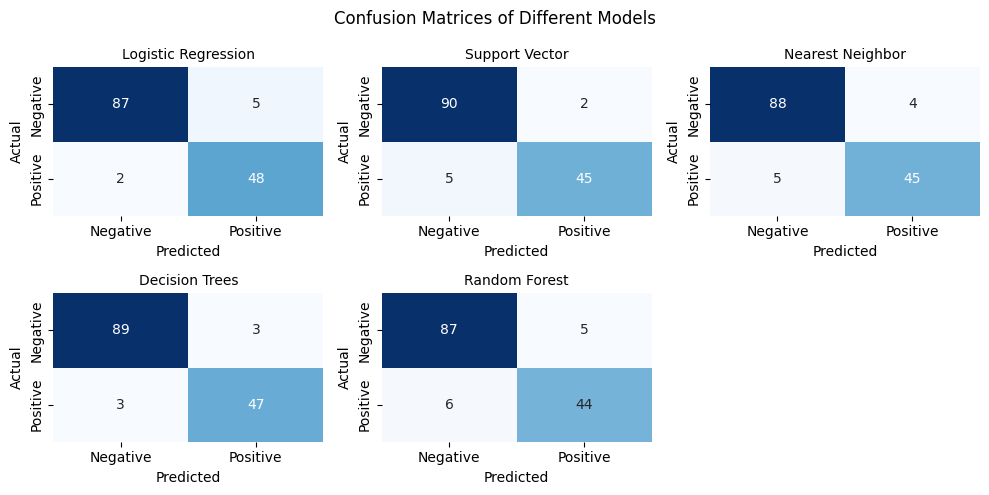

In [23]:
#Creating confusion matrix for models
fig, axes = plt.subplots(2, 3, figsize = (10, 5))
cm1 = confusion_matrix(Y_test, Y_pred1)
cm2 = confusion_matrix(Y_test, Y_pred2)
cm3 = confusion_matrix(Y_test, Y_pred3)
cm4 = confusion_matrix(Y_test, Y_pred4)
cm5 = confusion_matrix(Y_test, Y_pred5)
plt.suptitle('Confusion Matrices of Different Models')
model_names = ['Logistic Regression', 'Support Vector', 'Nearest Neighbor', 'Decision Trees', 'Random Forest']
cm_list = [cm1, cm2, cm3, cm4, cm5]

for i, (cm, name) in enumerate(zip(cm_list, model_names)):
    ax = axes[i // 3, i % 3]
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {"size": 10},
                xticklabels = ['Negative', 'Positive'],
                yticklabels = ['Negative', 'Positive'], ax=ax)
    ax.set_title(f'{name}', fontsize = 10)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

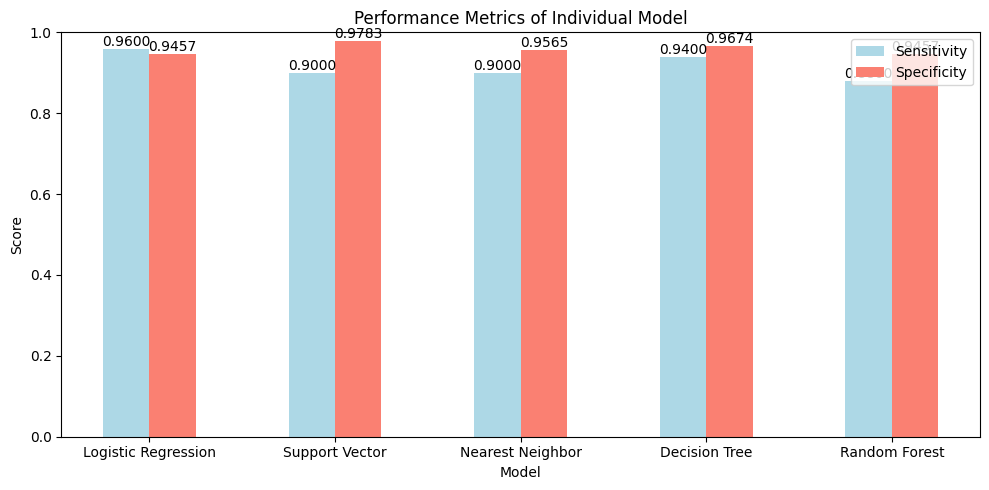

In [24]:
#Performance matrics for individual models
fig, ax = plt.subplots(figsize=(10, 5))
confusion_matrices = {"Logistic Regression": cm1, "Support Vector": cm2, "Nearest Neighbor": cm3, "Decision Tree": cm4, "Random Forest": cm5}
sensitivities = {
    model_name: tp / (tp + fn)
    for model_name, cm in confusion_matrices.items()
    for tn, fp, fn, tp in [cm.ravel()]
}
specificities = {
    model_name: tn / (tn + fp)
    for model_name, cm in confusion_matrices.items()
    for tn, fp, fn, tp in [cm.ravel()]
}
models = list(sensitivities.keys())
sensitivity_values = list(sensitivities.values())
specificity_values = list(specificities.values())
num_models = len(models)
bar_width = 0.25
index = np.arange(num_models)
bars_sens = ax.bar(index - bar_width / 2, sensitivity_values, bar_width, label = 'Sensitivity', color = 'lightblue')
bars_spec = ax.bar(index + bar_width / 2, specificity_values, bar_width, label = 'Specificity', color = 'salmon')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()
ax.set_title('Performance Metrics of Individual Model')
ax.set_xlabel('Model')
ax.set_ylabel('Score')
for bar in bars_sens:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha = 'center', va = 'bottom', fontsize = 10, color = 'black')
for bar in bars_spec:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha = 'center', va = 'bottom', fontsize = 10, color = 'black')
plt.tight_layout()
plt.show()

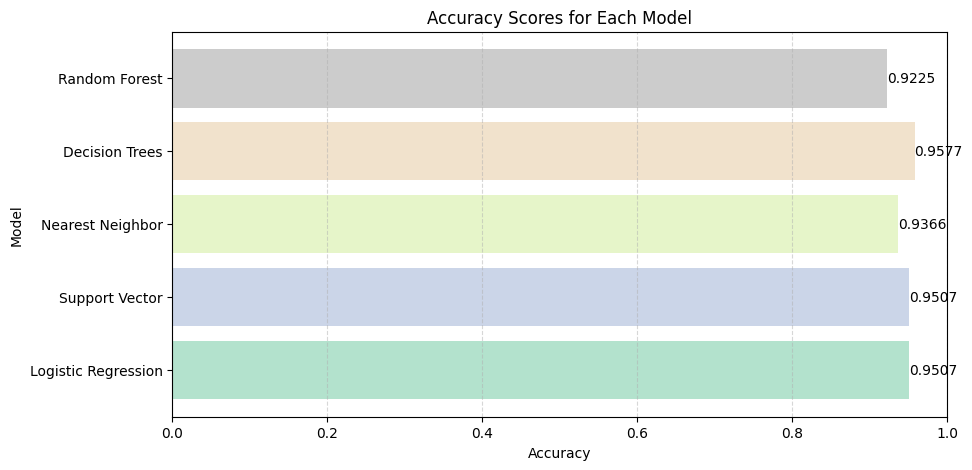

In [25]:
#Calculating accuracy for each model
plt.figure(figsize = (10, 5))
model_predictions = {"Logistic Regression": Y_pred1, "Support Vector": Y_pred2, "Nearest Neighbor": Y_pred3, "Decision Trees": Y_pred4, "Random Forest": Y_pred5}
accuracies = {model_name: accuracy_score(Y_test, predictions) for model_name, predictions in model_predictions.items()}
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())
colors = plt.cm.Pastel2(np.linspace(0, 1, len(models)))
bars = plt.barh(models , accuracy_values , color = colors)
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.4f}',
             va = 'center', ha = 'left', fontsize = 10, color = 'black')
plt.xlim(0, 1)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.title('Accuracy Scores for Each Model')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

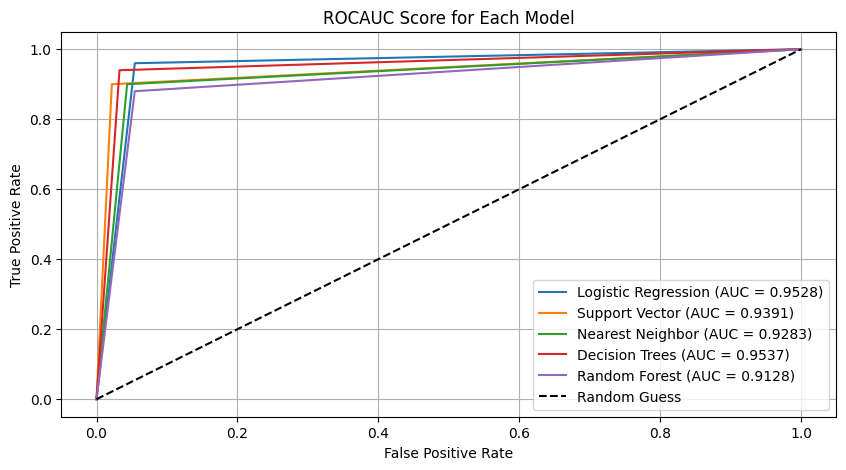

In [26]:
#Calculating ROCAUC of the model
plt.figure(figsize = (10, 5))
model_predictions = {"Logistic Regression": Y_pred1, "Support Vector": Y_pred2, "Nearest Neighbor": Y_pred3, "Decision Trees": Y_pred4, "Random Forest": Y_pred5
}
for model_name, predictions in model_predictions.items():
    fpr, tpr, _ = roc_curve(Y_test, predictions)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f'{model_name} (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guess')
plt.grid(True)
plt.legend(loc = 'lower right')
plt.title('ROCAUC Score for Each Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

  0%|          | 0/142 [00:00<?, ?it/s]

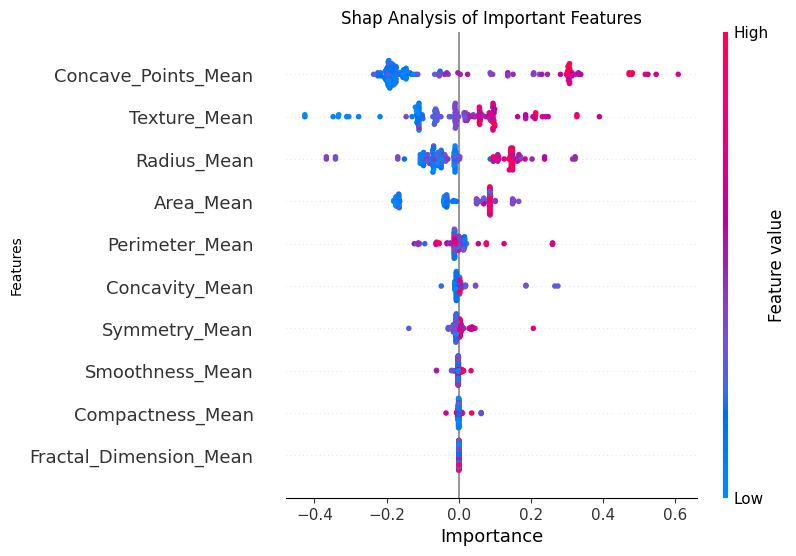

In [27]:
#Creating the SHAP for evaluation
plt.figure(figsize = (10, 5))
explainer = shap.KernelExplainer(DT.predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, show = False)
plt.title('Shap Analysis of Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()